In [2]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [3]:
!mkdir drive
!google-drive-ocamlfuse drive
!ls drive/"Colab Notebooks"

5291_Dataclean.ipynb  Phasei_try.ipynb	Untitled0.ipynb


In [0]:
import pandas as pd
import numpy as np
from operator import methodcaller
data= pd.read_csv('drive/5291/feature_data.csv')
data2=pd.read_csv('drive/5291/member_xizhang2.csv')[['msno','repeate_rates']]

In [0]:
data2.repeate_rates=data2.repeate_rates*100

In [0]:
data1=data[['msno','bd','song_counts','genre_counts','mean_song_len']]

In [0]:
data_numeric=data1.merge(data2, left_on='msno', right_on='msno', how='outer').dropna()

In [0]:
num_mat=data_numeric.iloc[:,1:].values

In [35]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(num_mat)
X = pca.transform(num_mat)
print("original shape:   ", num_mat.shape)
print("transformed shape:", X.shape)

original shape:    (26596, 5)
transformed shape: (26596, 3)


In [39]:
print(pca.explained_variance_ratio_) 

[0.98296918 0.0103651  0.00614108]


In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)


In [0]:
# Initializing KMeans
kmeans = KMeans(n_clusters=20)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

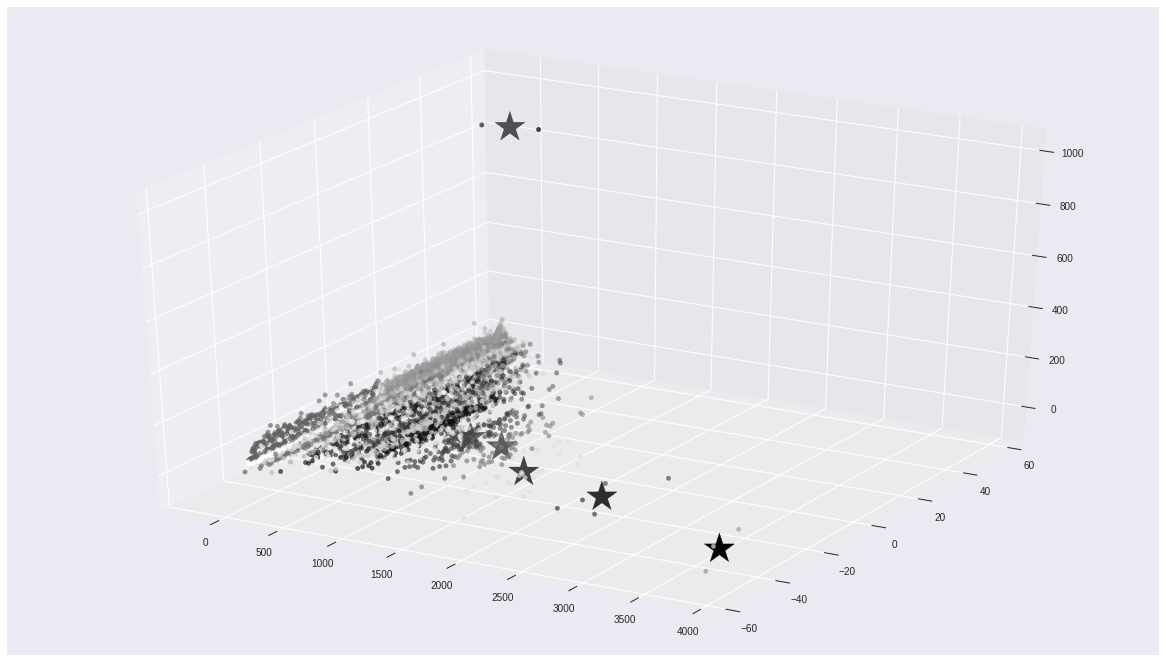

In [38]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=kmeans.labels_)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
plt.savefig('drive/5291/3D_clustering.png')

In [0]:
pca = PCA(n_components=2)
pca.fit(num_mat)
X = pca.transform(num_mat)

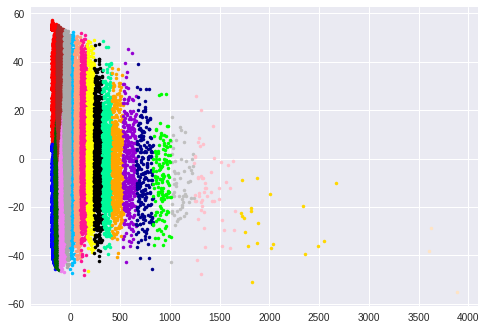

In [16]:
!pip install pyclustering
import pyclustering
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.xmeans import xmeans
from pyclustering.utils import draw_clusters
initial_centers = kmeans_plusplus_initializer(X, 2).initialize();
xmeans_instance = xmeans(X, initial_centers, ccore = True);
# run cluster analysis
xmeans_instance.process();
# obtain results of clustering
clusters = xmeans_instance.get_clusters();
# display allocated clusters
draw_clusters(X, clusters)

In [18]:
len(clusters)

20

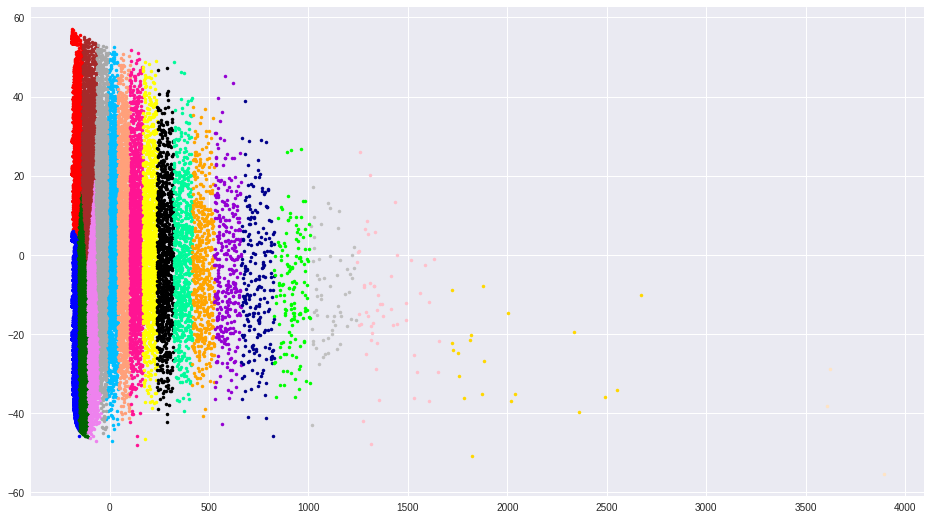

In [41]:
plt.rcParams['figure.figsize'] = (16, 9)
draw_clusters(X, clusters)
# 